In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
#df = pd.read_csv("cong-test/e2e-1_0-01.csv")
#df2 = pd.read_csv("cong-test/e2e-2_1.csv")
#df3 = pd.read_csv("cong-test/e2e-3_10.csv")
df1 = pd.read_csv("cong-test/e2e-4_1000.csv")
df2 = pd.read_csv("cong-test/e2e-5_10000.csv")
df3 = pd.read_csv("cong-test/e2e-6_100000.csv")
df4 = pd.read_csv("cong-test/e2e-9_1000000.csv")
df5 = pd.read_csv("cong-test/e2e-10_10000000.csv")
df6 = pd.read_csv("cong-test/e2e-11_100000000.csv")
df7 = pd.read_csv("cong-test/e2e-12_1000000000.csv")
df8 = pd.read_csv("cong-test/e2e-7_10000000000.csv")
#df8 = pd.read_csv("cong-test/e2e-8_100000000000.csv")

dfs = [df1, df2, df3, df4, df5, df6, df7, df8]

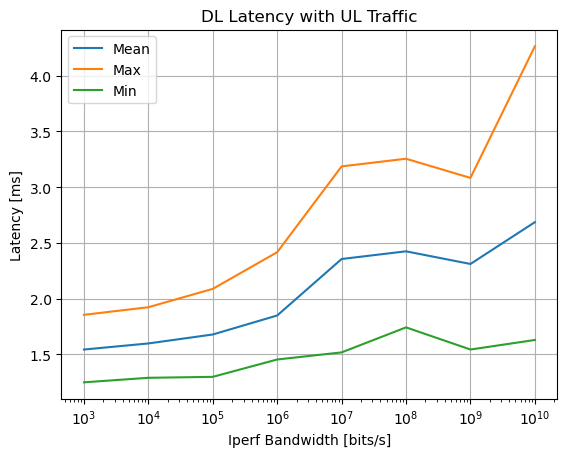

In [141]:
means = []
bw = [1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]
mins = []
maxs = []

for df in dfs:
    quant = df["time"].quantile(0.95)
    mean = df[df["time"] < quant]["time"].mean()*1000
    mini = df[df["time"] < quant]["time"].min()*1000
    maxi = df[df["time"] < quant]["time"].max()*1000
    #mean = df["time"].mean()*1000
    #mini = df["time"].min()*1000
    #maxi = df["time"].max()*1000
    means.append(mean)
    mins.append(mini)
    maxs.append(maxi)

plt.plot(bw, means, label="Mean")
plt.plot(bw, maxs, label="Max")
plt.plot(bw, mins, label="Min")
plt.grid()
plt.xscale("log")
plt.xlabel("Iperf Bandwidth [bits/s]")
plt.ylabel("Latency [ms]")
plt.xticks(bw)
plt.title("DL Latency with UL Traffic")
plt.legend()
plt.savefig("latency-vs-cong.png")
plt.show()

In [142]:
sizes = [1024]
bw = [1000, 10000, 1000000, 10000000, 100000000, 1000000000, 10000000000]
numbers = [4, 5, 9, 10, 11, 12, 7]
means_2 = []
mins = []
maxs = []

rlc = []
sdap = []
pdcp = []

for i, j in zip(bw, numbers):
    print(f"Iperf Bw: {i}")
    df = pd.read_csv(f"cong-test/{j}_{i}.csv")
    df = df.sort_values(by="time")
    df = df.dropna().reset_index()

    times = df["time"].unique()
    values = [times[0]]
    
    for time in times:
        add = True
        for value in values:
            if abs(value-time) < 50000:
                add = False
        if add:
            values.append(time)

    print(f"Total number of packets: {len(values)}")

    shapes = []
    times = {}
    function_calls = {}
    sdap_total_calls = []
    mean_time = []

    for module in df["module"].unique():
        times[module] = {}
        for time in sizes:
            times[module][time] = []
        function_calls[module] = []

    for time in values:
        df_temp = df[df["time"] >= time][df["time"] < time+50000]
        df_temp = df_temp.sort_values(by="time")
        
        shapes.append(df_temp[df_temp["timing"] == "start"].shape[0])
        end_time = df_temp["time"].max()
        
        total_time = df_temp["time"].max()-df_temp["time"].min()
        mean_time.append(total_time)
        
        
          ## Create Temp Dict
        protocol_time = {}
        for module in df_temp["module"].unique():        
            protocol_time[module] = 0
            
        start = df_temp.reset_index()
        for ind in start.index[:-1]:
            curr_time = start["time"][ind]
            next_time = start["time"][ind+1]
            time = next_time - curr_time

            if start["function"][ind+1] == "start":
                module = start["module"][ind]
            else:
                module = start["module"][ind+1]
            protocol_time[module] += time
    
        ## Add Times to Final Dict
        temp = 0 
        for i in protocol_time:
            temp += protocol_time[i]
            times[i][sizes[0]].append(protocol_time[i])
    
    new_time = np.array(mean_time)
    mask = new_time < np.quantile(mean_time, 1)
    new_mean_time = new_time[mask]
    
    rlc_temp = np.array(times["[RLC]"][1024])[mask]
    rlc.append(np.mean(rlc_temp)/1000)
    
    pdcp_temp = np.array(times["[PDCP]"][1024])[mask]
    pdcp.append(np.mean(pdcp_temp)/1000)
    
    sdap_temp = np.array(times["[SDAP]"][1024])[mask]
    sdap.append(np.mean(sdap_temp)/1000)
    
    means_2.append(np.mean(new_mean_time)/1000)
    maxs.append(np.max(new_mean_time)/1000)
    mins.append(np.min(new_mean_time)/1000)

Iperf Bw: 1000
Total number of packets: 100
Iperf Bw: 10000
Total number of packets: 100


/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[d

/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[d

Iperf Bw: 1000000
Total number of packets: 100
Iperf Bw: 10000000
Total number of packets: 100


/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[d

Iperf Bw: 100000000
Total number of packets: 100
Iperf Bw: 1000000000
Total number of packets: 100
Iperf Bw: 10000000000
Total number of packets: 100


/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[df["time"] >= time][df["time"] < time+50000]
/tmp/ipykernel_6047/2643334219.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df[d

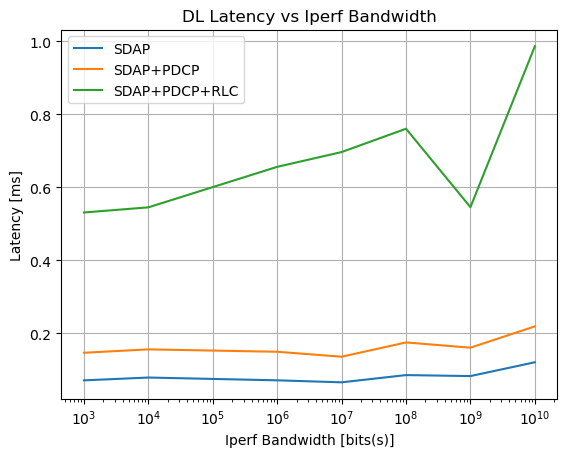

In [147]:
rlc = np.array(rlc)
sdap = np.array(sdap)
pdpc = np.array(pdcp)

plt.plot(bw, sdap, label="SDAP")
plt.plot(bw, sdap+pdcp, label="SDAP+PDCP")
plt.plot(bw, sdap+pdcp+rlc, label="SDAP+PDCP+RLC")

plt.grid()
plt.xlabel("Iperf Bandwidth [bits(s)]")
plt.ylabel("Latency [ms]")
plt.xticks(bw)
plt.xscale("log")
plt.title("DL Latency vs Iperf Bandwidth")
plt.legend()
plt.savefig("pl_latency-vs-bw.png")
plt.show()